<a href="https://colab.research.google.com/github/Adhira-Deogade/INFO-7374---Assignment-3/blob/master/Expt1_BoW_Optimizing_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import division
from __future__ import print_function

In [2]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 1.13.1


Using TensorFlow backend.


In [3]:
ls

sample_data/


In [0]:
from google.colab import files

In [11]:
upload = files.upload()

Saving cleanedfinancial_data.csv to cleanedfinancial_data.csv


In [0]:
## Our file is present, just import it

In [0]:
dataset = pd.read_csv("cleanedfinancial_data.csv")

In [0]:
dataset.head()

In [0]:
dataset.drop(columns="Unnamed: 0", inplace=True)

Value counts

In [0]:
dataset.sentiment.value_counts()

**Data is imbalanced, therefore, we first build a logistic regression model as our base model**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
dataset.shape[0]

In [0]:
dataset.iloc[2,1]

In [15]:
import re
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#spell correction
# import autocorrect
# from autocorrect. import spell

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
dataset.shape

(1649, 2)

In [0]:
data = []

In [0]:
for i in range(dataset.shape[0]):
    sms = dataset.iloc[i, 1]

    # remove non alphabatic characters
    sms = re.sub('[^A-Za-z]', ' ', sms)

    # make words lowercase, because Go and go will be considered as two words
    sms = sms.lower()

    # tokenising
    tokenized_sms = wt(sms)

    # remove stop words and stemming
 
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(stopwords.words('english')):
            sms_processed.append(stemmer.stem(word))

    sms_text = " ".join(sms_processed)
    data.append(sms_text)

In [19]:
len(data)

1649

In [0]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features = 2000, min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = matrix.fit_transform(data).toarray()
y = dataset.iloc[:, 0]


In [0]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# Importing the libraries
import numpy as np
import re
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
ls

cleanedfinancial_data.csv  sample_data/


In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [26]:
y.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [28]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 1.13.1


In [0]:

train_posts = X_train
train_tags =y_train

test_posts = X_test
test_tags = y_test

In [0]:
max_words = 2000

In [0]:

# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [32]:
y_train

array([1, 2, 1, ..., 2, 2, 1])

In [0]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [34]:
y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [0]:
x_train = X_train
x_test = X_test

In [36]:

# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1319, 1949)
x_test shape: (330, 1949)
y_train shape: (1319, 3)
y_test shape: (330, 3)


In [0]:
### Grid Search

In [0]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
  model = Sequential()
  model.add(Dense(512,input_shape=(1949,)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy',
               optimizer=optimizer,
               metrics=['accuracy'])
  return model



In [0]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


In [0]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=80, verbose=0)

In [43]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Best: 0.687642 using {'optimizer': 'Adagrad'}
0.579985 (0.027507) with: {'optimizer': 'SGD'}
0.684610 (0.001275) with: {'optimizer': 'RMSprop'}
0.687642 (0.005931) with: {'optimizer': 'Adagrad'}
0.670205 (0.017430) with: {'optimizer': 'Adadelta'}
0.677028 (0.003564) with: {'optimizer': 'Adam'}
0.681577 (0.009606) with: {'optimizer': 'Adamax'}
0.686126 (0.002156) with: {'optimizer': 'Nadam'}


In [0]:
model = Sequential()
model.add(Dense(512,input_shape=(1949,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
 model.compile(loss='categorical_crossentropy',
               optimizer='Adagrad',
               metrics=['accuracy'])

In [47]:
history = model.fit(x_train, y_train,
                    batch_size=80,
                    epochs=5,
                    verbose=1,
                    validation_split=0.1)

Train on 1187 samples, validate on 132 samples
Epoch 1/5
1187/1187 [==============================] - 1s 436us/step - loss: 0.8936 - acc: 0.6327 - val_loss: 0.8833 - val_acc: 0.6212
Epoch 2/5
1187/1187 [==============================] - 0s 250us/step - loss: 0.4204 - acc: 0.8728 - val_loss: 0.9176 - val_acc: 0.6515
Epoch 3/5
1187/1187 [==============================] - 0s 246us/step - loss: 0.2758 - acc: 0.9301 - val_loss: 0.9474 - val_acc: 0.6439
Epoch 4/5
1187/1187 [==============================] - 0s 252us/step - loss: 0.1839 - acc: 0.9587 - val_loss: 1.0209 - val_acc: 0.6364
Epoch 5/5
1187/1187 [==============================] - 0s 257us/step - loss: 0.1388 - acc: 0.9705 - val_loss: 1.0788 - val_acc: 0.6439


In [49]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=80, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

330/330 [==============================] - 0s 126us/step
Test score: 0.9124395522204313
Test accuracy: 0.6848484855709653


In [0]:

y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [0]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [0]:
text_labels = encoder.classes_ 

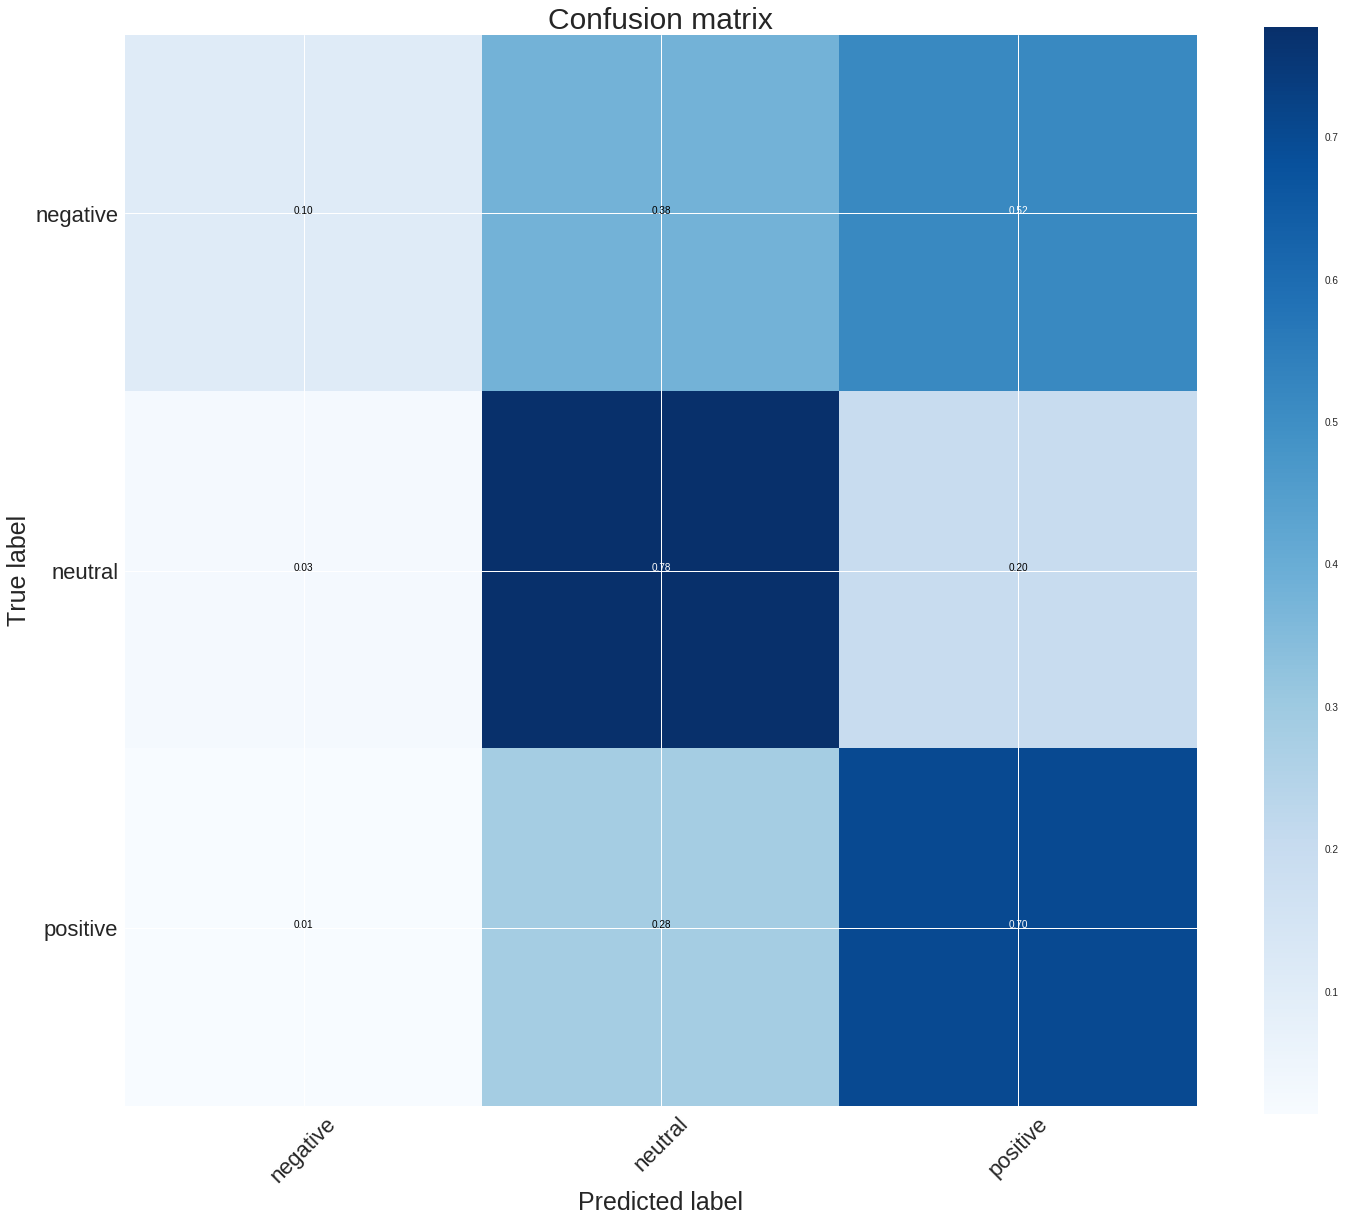

In [53]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [0]:
from sklearn.metrics import f1_score

In [55]:
f1_score(y_test_1d, y_pred_1d, average='macro')

0.5297376444298004